# Measures of Centrality and Spread

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("/home/kristian/Downloads/Student Data Portrait.xlsx")

In [4]:
df.head(3)

,chars_in_name,members_in_household,national_symbol,mode_of_transport,charge
0,8,4,swan,bike,61.0
1,5,5,moon_and_star,car,58.0
2,5,2,ankh,boat,81.0


In [67]:
df.shape

(17, 5)

### Analyze a categorical variable

In [7]:
df["mode_of_transport"].value_counts()

mode_of_transport
car      6
bike     3
boat     2
plane    2
walk     1
train    1
ferry    1
Name: count, dtype: int64

<Axes: xlabel='mode_of_transport'>

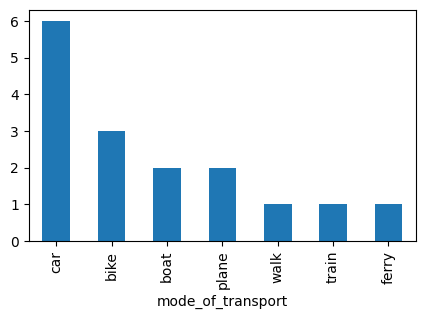

In [12]:
df["mode_of_transport"].value_counts().plot.bar(figsize=(5,3))  # or .barh

### Measures of Centrality for a scalar variable

In [16]:
float(df["charge"].mean())

62.5625

In [17]:
float(df["charge"].median())

63.0

In [18]:
df["charge"].mode()

0    47.0
1    58.0
2    61.0
Name: charge, dtype: float64

### Measures of Spread for a scalar variable

In [25]:
float(round(df["charge"].std(), 2))

19.28

In [28]:
float(df["charge"].min()), float(df["charge"].max())

(21.0, 86.0)

In [29]:
df["charge"].var()

np.float64(371.59583333333336)

In [33]:
# quantile - not very practical
pd.qcut(x=df["charge"], q=4).head(3)

0    (55.25, 63.0]
1    (55.25, 63.0]
2     (77.5, 86.0]
Name: charge, dtype: category
Categories (4, interval[float64, right]): [(20.999, 55.25] < (55.25, 63.0] < (63.0, 77.5] < (77.5, 86.0]]

In [34]:
# shortcut
df["charge"].describe()

count    16.000000
mean     62.562500
std      19.276821
min      21.000000
25%      55.250000
50%      63.000000
75%      77.500000
max      86.000000
Name: charge, dtype: float64

<Axes: >

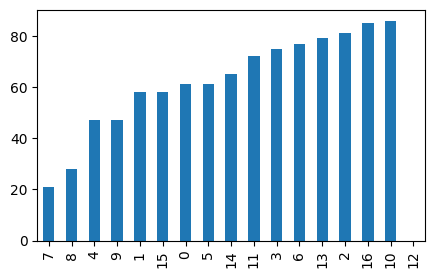

In [37]:
df["charge"].sort_values().plot.bar(figsize=(5, 3))

<Axes: >

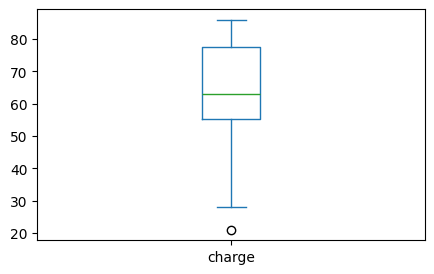

In [39]:
df["charge"].plot.box(figsize=(5,3))

<Axes: >

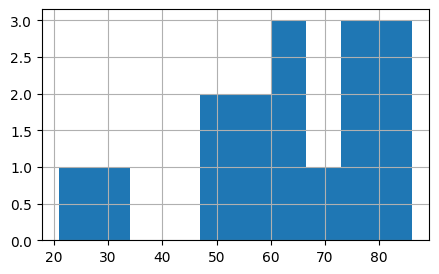

In [41]:
df["charge"].hist(bins=10, figsize=(5,3))

### Bivariate Statistics

<Axes: xlabel='mode_of_transport'>

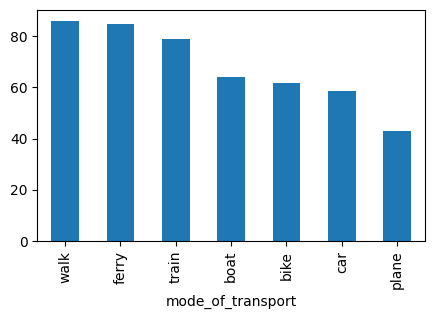

In [52]:
# one mean separately for each unique mode of transport
df.groupby("mode_of_transport")["charge"].mean().sort_values(ascending=False).plot.bar(figsize=(5,3))

In [53]:
# Q: how to draw a dot on top instead of the bars?

### Pivot Table
we examine 2 categorical and 1 numerical variable

In [55]:
pivot = df.groupby(["mode_of_transport", "members_in_household"])["charge"].mean().unstack()
pivot

members_in_household,2,4,5,6
mode_of_transport,,,,
bike,NaN,61.0,62.0,NaN
boat,81.0,47.0,NaN,NaN
car,NaN,51.5,58.0,66.5
ferry,85.0,NaN,NaN,NaN
plane,NaN,65.0,21.0,NaN
train,NaN,79.0,NaN,NaN
walk,NaN,86.0,NaN,NaN


In [58]:
pivot = df.groupby(["mode_of_transport", "members_in_household"])["charge"].count().unstack()
pivot = pivot.fillna(0.0)
pivot

members_in_household,2,4,5,6
mode_of_transport,,,,
bike,0.0,1.0,2.0,0.0
boat,1.0,1.0,0.0,0.0
car,0.0,2.0,2.0,2.0
ferry,1.0,0.0,0.0,0.0
plane,0.0,1.0,1.0,0.0
train,0.0,1.0,0.0,0.0
walk,0.0,1.0,0.0,0.0


<Axes: xlabel='members_in_household'>

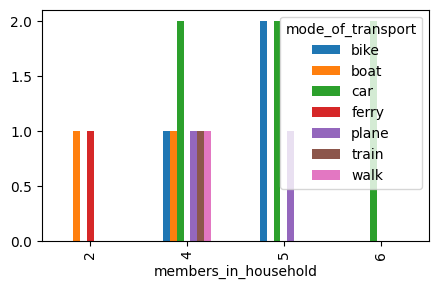

In [65]:
pivot.T.plot.bar(figsize=(5, 3))

<Axes: xlabel='members_in_household', ylabel='mode_of_transport'>

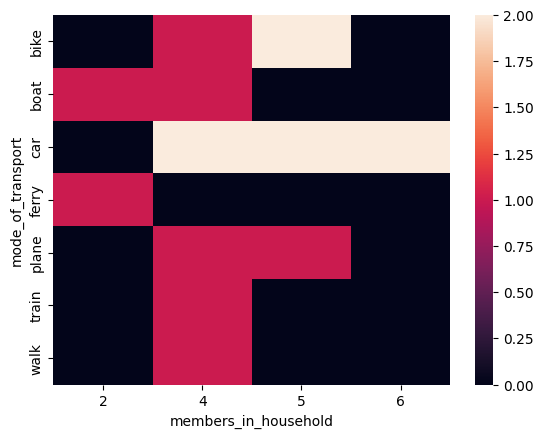

In [66]:
sns.heatmap(pivot)

<Axes: xlabel='members_in_household', ylabel='charge'>

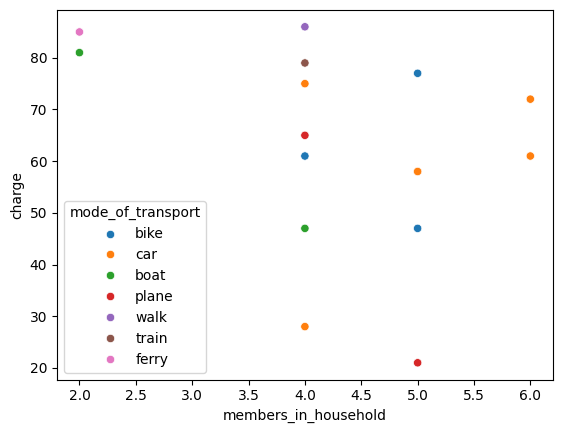

In [61]:
import seaborn as sns

sns.scatterplot(data=df, x="members_in_household", y="charge",
                hue="mode_of_transport")

In [69]:
(pivot / 17).round(3)

members_in_household,2,4,5,6
mode_of_transport,,,,
bike,0.000,0.059,0.118,0.000
boat,0.059,0.059,0.000,0.000
car,0.000,0.118,0.118,0.118
ferry,0.059,0.000,0.000,0.000
plane,0.000,0.059,0.059,0.000
train,0.000,0.059,0.000,0.000
walk,0.000,0.059,0.000,0.000


In [70]:
(pivot / pivot.sum()).round(3)

members_in_household,2,4,5,6
mode_of_transport,,,,
bike,0.0,0.143,0.4,0.0
boat,0.5,0.143,0.0,0.0
car,0.0,0.286,0.4,1.0
ferry,0.5,0.000,0.0,0.0
plane,0.0,0.143,0.2,0.0
train,0.0,0.143,0.0,0.0
walk,0.0,0.143,0.0,0.0
